# GloVe: Dimentionality Reduction

[GloVe: Gloval Vectors for word Representation](https://nlp.stanford.edu/projects/glove/)

Amir Hossein Binesh, AmirKabir University of Technology

---

## Part 1 : Download and unpack the data

In [1]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

In [2]:
import zipfile

zip_ref = zipfile.ZipFile("glove.6B.zip", 'r')
zip_ref.extractall("/content/datasets/")
zip_ref.close()

**Store the data into two lists**: One consisting of words and the other stores embedding vectors

In [3]:
import io
import numpy as np


# Store the data into two lists
embedding_words = []
embedding_vectors = []
with io.open('datasets/glove.6B.50d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        embedding_words.append(values[0])
        embedding_vectors.append(np.asarray(values[1:],dtype='float32'))
embedding_vectors = np.array(embedding_vectors)

## Part 2 : Implement PCA

In [4]:
def pca(data, r):
  # Normalize data
  normalized_data = data - data.mean(axis = 0)

  # Calculate covariance matrix
  sigma = np.cov(normalized_data.T)

  # Get eigon vectors and values of covariance matrix
  eigon_values, eigon_vectors = np.linalg.eig(sigma)

  # Sort eigon vectors according to their corresponding eigon values
  pcs = eigon_vectors[:,eigon_values.argsort()[::-1]]

  # Map original data onto r most important priciple components
  return data.dot(pcs[:, :r])

In [5]:
reduced_data = pca(embedding_vectors, 2)

## Part 3 : Plot reduced sample on 2D

In [6]:
import matplotlib.pyplot as plt

def plot_words(words, vectors):
  fig, ax = plt.subplots(figsize=(12,12))
  ax.scatter(vectors[:,0], vectors[:,1], s=50)

  for i, txt in enumerate(words):
    ax.annotate(txt, (vectors[i,0], vectors[i,1]), fontsize = 24)

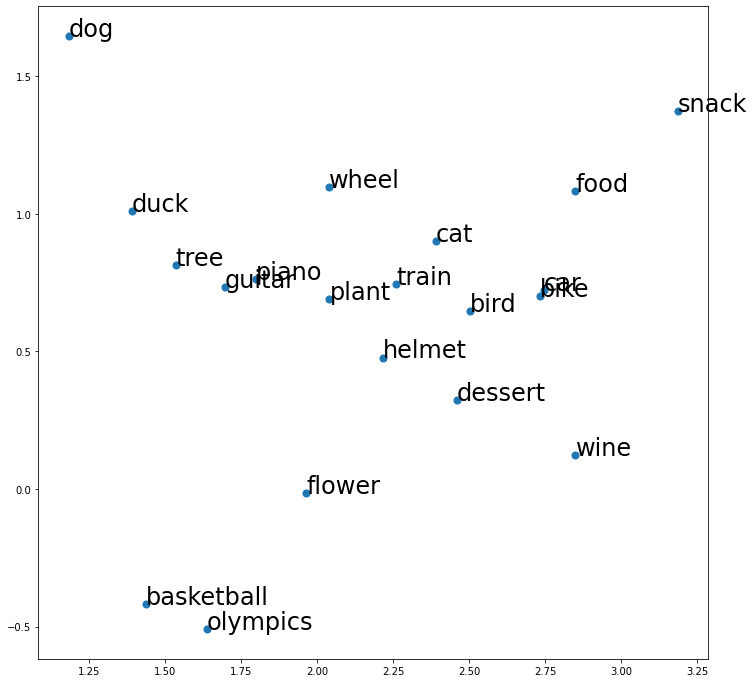

In [7]:
sample_keys = ['food', 'snack', 'dessert', 'wine', 'bike', 'car', 'wheel', 'train', 'helmet', 'cat', 'dog', 'duck', 'bird', 'plant', 'tree', 'flower', 'guitar', 'piano', 'basketball', 'olympics']
indices = np.where(np.isin(embedding_words, sample_keys))
sample_vectors = np.take(reduced_data, indices, axis = 0)[0]
plot_words(sample_keys, sample_vectors)